In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# 데이터 전처리 - 결측치, 중복치, 이상치 제거 
# 1. 결측치 제거 
df.isna().sum() # 결측치 없음
df.duplicated().sum() # 중복치 1개
df.drop_duplicates(inplace=True) # 1개 중복치 제거 
df.duplicated().sum() # 중복치 0개 

0

In [3]:
op_df = df.loc[:, 'oldpeak'].reset_index()
op_df

,index,oldpeak
0,0,2.3
1,1,3.5
2,2,1.4
3,3,0.8
4,4,0.6
...,...,...
297,298,0.2
298,299,1.2
299,300,3.4
300,301,1.2


In [4]:
th_df = df.loc[:, 'oldpeak'].reset_index()
op_df

,index,oldpeak
0,0,2.3
1,1,3.5
2,2,1.4
3,3,0.8
4,4,0.6
...,...,...
297,298,0.2
298,299,1.2
299,300,3.4
300,301,1.2


In [5]:
# 이상치 제거 (oldpeak)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_to_op = std.fit_transform(op_df[['oldpeak']])
std_to_op

array([[ 1.08402203],
       [ 2.11892611],
       [ 0.30784398],
       [-0.20960805],
       [-0.38209207],
       [-0.55457608],
       [ 0.22160198],
       [-0.8995441 ],
       [-0.46833407],
       [ 0.48032799],
       [ 0.13535997],
       [-0.72706009],
       [-0.38209207],
       [ 0.65281201],
       [-0.03712404],
       [ 0.48032799],
       [-0.8995441 ],
       [ 1.34274805],
       [ 0.39408599],
       [ 0.65281201],
       [-0.46833407],
       [-0.55457608],
       [-0.8995441 ],
       [-0.03712404],
       [ 0.30784398],
       [-0.55457608],
       [ 0.48032799],
       [-0.38209207],
       [-0.20960805],
       [ 0.13535997],
       [-0.8995441 ],
       [-0.55457608],
       [-0.8995441 ],
       [-0.46833407],
       [ 0.30784398],
       [ 0.30784398],
       [-0.8995441 ],
       [ 0.48032799],
       [-0.20960805],
       [-0.20960805],
       [ 0.39408599],
       [-0.72706009],
       [ 1.68771608],
       [-0.55457608],
       [-0.8995441 ],
       [-0

In [6]:
op_df['oldpeak'] = std_to_op
op_df

,index,oldpeak
0,0,1.084022
1,1,2.118926
2,2,0.307844
3,3,-0.209608
4,4,-0.382092
...,...,...
297,298,-0.727060
298,299,0.135360
299,300,2.032684
300,301,0.135360


In [7]:
cond1 = op_df['oldpeak'] >= -1.96
cond2 = op_df['oldpeak'] <= 1.96
cond = cond1 & cond2
df = df.iloc[op_df[cond].index].reset_index(drop=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
2,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
4,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
281,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
282,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
283,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


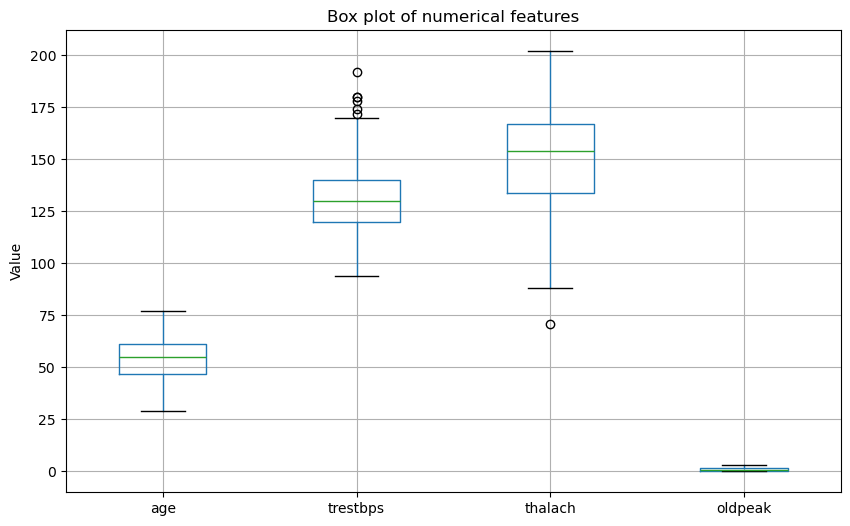

In [8]:
# 박스 플롯 그리기
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # 그래프 크기 설정
df.boxplot(column=['age', 'trestbps', 'thalach', 'oldpeak'])
plt.title('Box plot of numerical features')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [9]:
# 콜레스테롤 , trestbps, thalach  이상치 발견 제거 한다. 

tb_df = df.loc[:, 'trestbps'].reset_index()
tb_df


,index,trestbps
0,0,145
1,1,130
2,2,120
3,3,120
4,4,140
...,...,...
280,280,164
281,281,140
282,282,110
283,283,130


In [10]:
th_df = df.loc[:,'thalach'].reset_index()
th_df

,index,thalach
0,0,150
1,1,172
2,2,178
3,3,163
4,4,148
...,...,...
280,280,90
281,281,123
282,282,132
283,283,115


In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_to_tb = std.fit_transform(tb_df[['trestbps']])
std_to_tb

array([[ 0.86087925],
       [-0.03784085],
       [-0.63698758],
       [-0.63698758],
       [ 0.56130589],
       [ 0.56130589],
       [-0.63698758],
       [ 2.47857543],
       [ 1.16045262],
       [ 0.56130589],
       [-0.03784085],
       [-0.03784085],
       [-1.23613431],
       [ 1.16045262],
       [-0.63698758],
       [-0.63698758],
       [ 1.16045262],
       [ 1.16045262],
       [ 0.56130589],
       [ 0.26173252],
       [-0.03784085],
       [ 0.56130589],
       [ 1.16045262],
       [ 0.56130589],
       [ 1.75959935],
       [ 1.16045262],
       [-1.23613431],
       [ 0.56130589],
       [-0.03784085],
       [-1.53570768],
       [-0.63698758],
       [-0.03784085],
       [-0.33741421],
       [-0.33741421],
       [ 0.68113523],
       [ 0.26173252],
       [ 1.16045262],
       [ 1.46002598],
       [ 1.75959935],
       [ 0.56130589],
       [-0.03784085],
       [-1.59562235],
       [-0.03784085],
       [ 0.56130589],
       [-0.63698758],
       [ 0

In [12]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_to_th = std.fit_transform(th_df[['thalach']])
std_to_th

array([[ 1.98392037e-03],
       [ 9.58843976e-01],
       [ 1.21980581e+00],
       [ 5.67401226e-01],
       [-8.50033574e-02],
       [ 1.32464837e-01],
       [ 1.00233761e+00],
       [ 5.23907587e-01],
       [ 1.04583125e+00],
       [ 4.36920309e-01],
       [-4.76446107e-01],
       [ 9.15350337e-01],
       [-2.58977913e-01],
       [ 5.23907587e-01],
       [ 3.49933032e-01],
       [ 9.58843976e-01],
       [-1.56378708e+00],
       [ 9.15350337e-01],
       [ 4.54775593e-02],
       [ 4.80413948e-01],
       [ 1.26329945e+00],
       [ 1.21980581e+00],
       [-5.63433385e-01],
       [ 1.21980581e+00],
       [ 5.23907587e-01],
       [ 3.06439393e-01],
       [-1.17234433e+00],
       [ 3.06439393e-01],
       [ 8.89711982e-02],
       [ 7.84869421e-01],
       [-4.32952469e-01],
       [ 1.65474220e+00],
       [ 8.89711982e-02],
       [-1.08535705e+00],
       [ 4.36920309e-01],
       [ 8.71856698e-01],
       [ 6.54388504e-01],
       [-8.50033574e-02],
       [ 4.5

In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
2,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
4,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
281,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
282,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
283,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
df.drop(columns=['chol'], inplace=True)
df

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1
1,41,0,1,130,0,0,172,0,1.4,2,0,2,1
2,56,1,1,120,0,1,178,0,0.8,2,0,2,1
3,57,0,0,120,0,1,163,1,0.6,2,0,2,1
4,57,1,0,140,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,59,1,0,164,1,0,90,0,1.0,1,2,1,0
281,57,0,0,140,0,1,123,1,0.2,1,0,3,0
282,45,1,3,110,0,1,132,0,1.2,1,0,3,0
283,57,1,0,130,0,1,115,1,1.2,1,1,3,0


In [15]:
df['trestbps'].describe().T

count    285.000000
mean     130.631579
std       16.719761
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      192.000000
Name: trestbps, dtype: float64

In [16]:
df.drop(columns=['thalach'], inplace=True)
df

,age,sex,cp,trestbps,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,0,2.3,0,0,1,1
1,41,0,1,130,0,0,0,1.4,2,0,2,1
2,56,1,1,120,0,1,0,0.8,2,0,2,1
3,57,0,0,120,0,1,1,0.6,2,0,2,1
4,57,1,0,140,0,1,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
280,59,1,0,164,1,0,0,1.0,1,2,1,0
281,57,0,0,140,0,1,1,0.2,1,0,3,0
282,45,1,3,110,0,1,0,1.2,1,0,3,0
283,57,1,0,130,0,1,1,1.2,1,1,3,0


In [17]:
df = df[(df['trestbps'] >= 90.0) & (df['trestbps'] <= 170.0)]
df

,age,sex,cp,trestbps,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,0,2.3,0,0,1,1
1,41,0,1,130,0,0,0,1.4,2,0,2,1
2,56,1,1,120,0,1,0,0.8,2,0,2,1
3,57,0,0,120,0,1,1,0.6,2,0,2,1
4,57,1,0,140,0,1,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
280,59,1,0,164,1,0,0,1.0,1,2,1,0
281,57,0,0,140,0,1,1,0.2,1,0,3,0
282,45,1,3,110,0,1,0,1.2,1,0,3,0
283,57,1,0,130,0,1,1,1.2,1,1,3,0


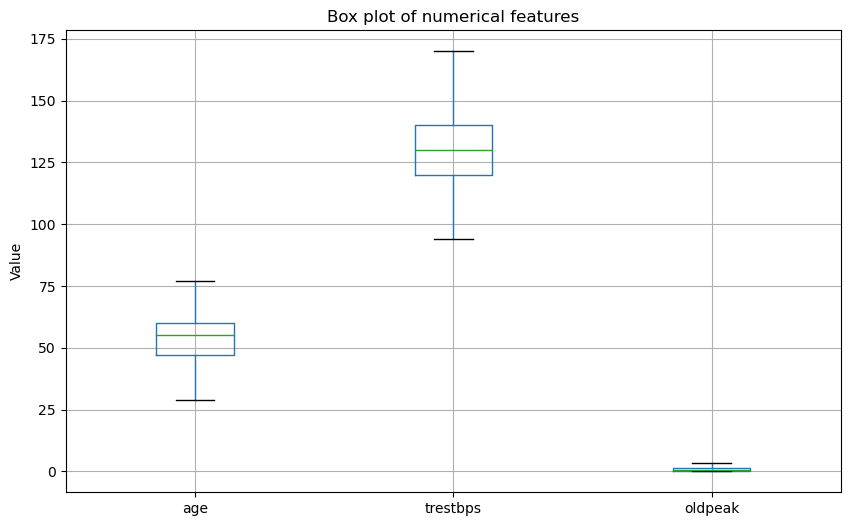

In [18]:
# 박스 플롯 그리기
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # 그래프 크기 설정
df.boxplot(column=['age', 'trestbps',  'oldpeak'])
plt.title('Box plot of numerical features')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#### 전처리 완료 

In [19]:
df

,age,sex,cp,trestbps,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,0,2.3,0,0,1,1
1,41,0,1,130,0,0,0,1.4,2,0,2,1
2,56,1,1,120,0,1,0,0.8,2,0,2,1
3,57,0,0,120,0,1,1,0.6,2,0,2,1
4,57,1,0,140,0,1,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
280,59,1,0,164,1,0,0,1.0,1,2,1,0
281,57,0,0,140,0,1,1,0.2,1,0,3,0
282,45,1,3,110,0,1,0,1.2,1,0,3,0
283,57,1,0,130,0,1,1,1.2,1,1,3,0


In [20]:
enc_df = df.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder

heart_encoder = LabelEncoder()

targets = heart_encoder.fit_transform(df['target'].tolist())
enc_df['target'] = targets


In [22]:
y = heart_encoder.classes_
y

array([0, 1])

In [23]:
heart_encoder.inverse_transform(enc_df['target'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

features, targets = df.iloc[:,:-1] , df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train.values) 

DecisionTreeClassifier()

In [25]:
features.columns

Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')

In [26]:
from sklearn.tree import export_graphviz

# targets를 문자열로 변환
class_names = targets.astype(str).tolist()

export_graphviz(dtc, out_file='./images/heart_dtc01.dot', class_names=class_names, feature_names=features.columns, 
                impurity=True, filled=True)

In [27]:
import graphviz

with open('./images/heart_dtc01.dot') as f:
    heart_dtc01 = f.read()

heart_dtc01_graph = graphviz.Source(heart_dtc01)
    

In [28]:
heart_dtc01_graph.render(filename="heart_dtc01", directory="./images", format="png")

'images\\heart_dtc01.png'

<img src='./images/heart_dtc01.png'>

In [29]:
df['thal'].drop_duplicates(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12760\4029805825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['thal'].drop_duplicates(inplace=True)


In [36]:
enc_df

,age,sex,cp,trestbps,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,0,2.3,0,0,1,1
1,41,0,1,130,0,0,0,1.4,2,0,2,1
2,56,1,1,120,0,1,0,0.8,2,0,2,1
3,57,0,0,120,0,1,1,0.6,2,0,2,1
4,57,1,0,140,0,1,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
280,59,1,0,164,1,0,0,1.0,1,2,1,0
281,57,0,0,140,0,1,1,0.2,1,0,3,0
282,45,1,3,110,0,1,0,1.2,1,0,3,0
283,57,1,0,130,0,1,1,1.2,1,1,3,0


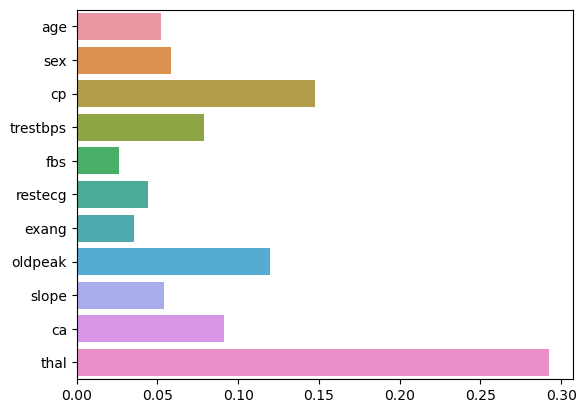

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

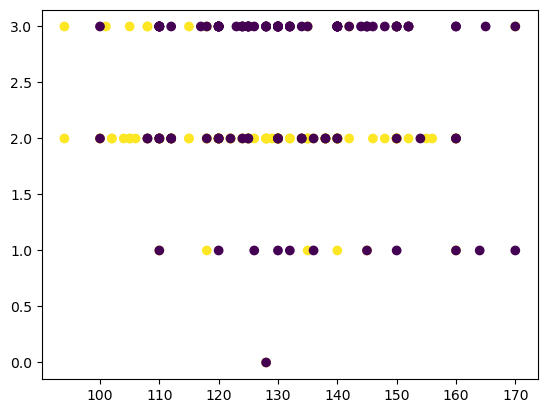

In [31]:
plt.scatter(features.iloc[:,3], features.iloc[:,-1], c=targets)

In [32]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

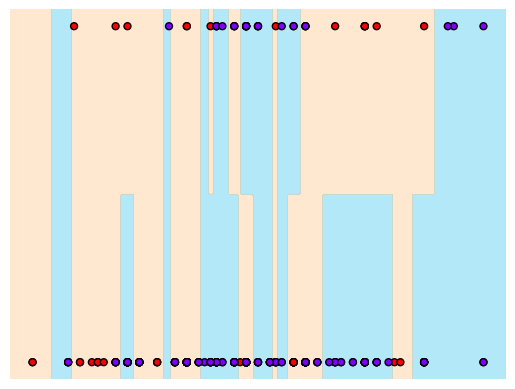

In [33]:
features_2_4 = features.iloc[:,[3,4]]
visualize_boundary(dtc, features_2_4, targets)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

features, targets = df.iloc[:,:-1] , df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train.values) 

DecisionTreeClassifier()

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))

0.7321428571428571